In [19]:
from scipy.odr import *
import sys
import os
sys.path.insert(0, '/home/noah/Desktop/large_analysis/ca_analysis')
import numpy as np
import matplotlib.pyplot as plt
import fileread as fr
import predefined as pd
import wave_ops as wo
from scipy.optimize import curve_fit
import scipy


def gauss(x,*pars):
    a,mu,sigma=pars
    return a*np.exp(-1.*(x.astype('float')-mu)**2./(2.*sigma**2.))


In [32]:
fs=35
d=fr.gen_output('/home/noah/Desktop/large_analysis/ca_analysis/oscillation/Run_0_0-std.bin')[0]
hist,bins=np.histogram(d['energy'],bins=1000,range=[0,5000])
bins=pd.cbins(bins)
mx=np.amax(hist)
loc=int(np.argmax(hist))
beg,end=bins[loc]-40,bins[loc]+40
print(beg,end,loc,mx)
fithist=hist[np.logical_and(bins>beg,bins<end)]
fitbins=bins[pd.land(bins>beg,bins<end)]
os.system('rm test3')
np.savetxt('test3',fithist)
pars=[mx,bins[loc],18]

prs,vrs=curve_fit(gauss,xdata=bins,ydata=hist,p0=pars)
print(prs)

957.5 1037.5 199 15037
[1.51597265e+04 9.97451043e+02 1.31695504e+01]


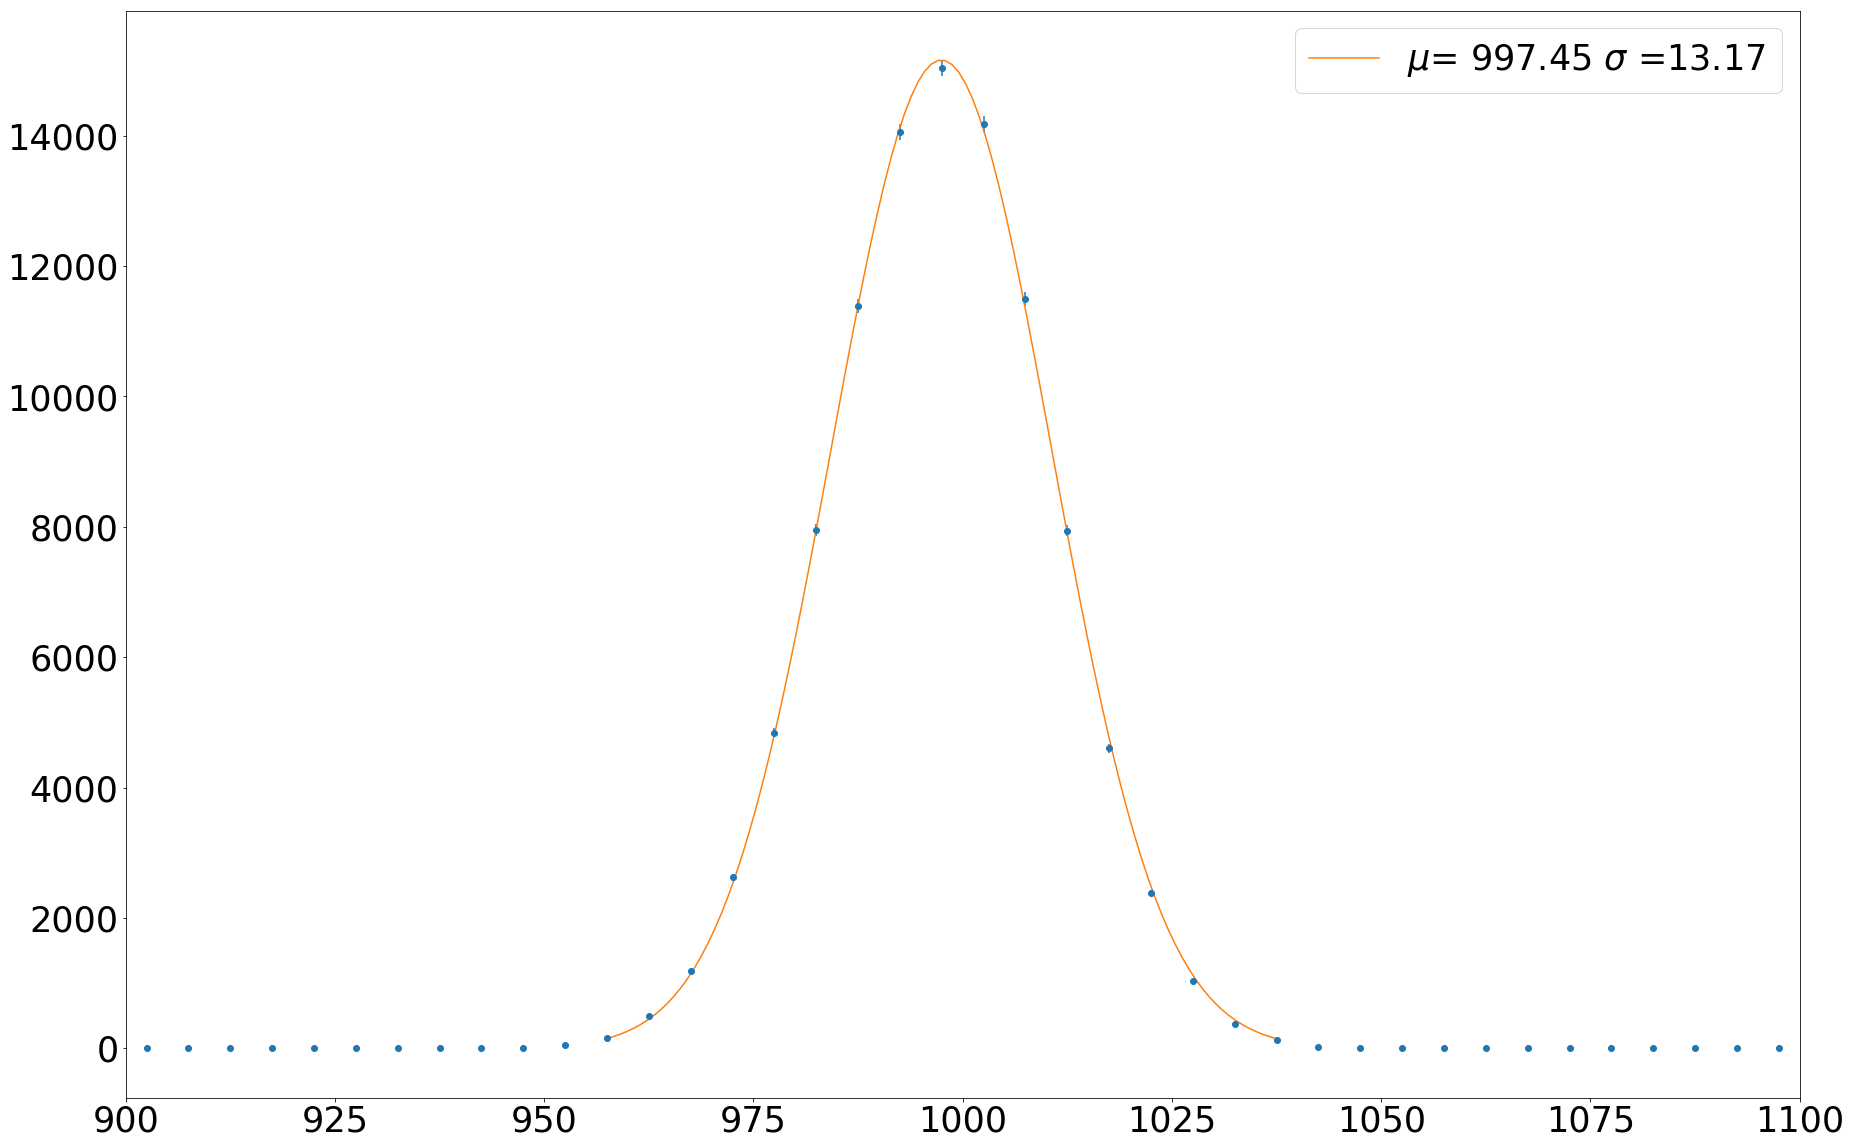

In [31]:
t=np.linspace(beg,end,100)
plt.figure(figsize=(30,20))
plt.errorbar(bins,hist,np.sqrt(hist),fmt='o')
plt.plot(t,gauss(t,*prs),label=r'$\mu$= {0:0.2f} $\sigma$ ={1:0.2f} '.format(prs[1],prs[2]))
plt.tick_params(labelsize=fs)
plt.legend(fontsize=fs)
plt.xlim(900,1100)
plt.show()